In [26]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

In [27]:
drivers = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\drivers.csv')
driver_standings = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\driver_standings.csv')
races =  pd.read_csv('D:\\Data_Science_Documents\\Formula_one\data_files\\races.csv')
teams = pd.read_csv('D:\Data_Science_Documents\Formula_one\data_files\constructors.csv')

Drivers Data Cleaning

In [28]:
drivers.drop(columns=['url', 'dob', 'nationality'], inplace=True)

Races Data Cleaning

In [29]:
races.drop(columns=['url', 'fp1_date', 'fp1_time', 'fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], inplace=True)

All 2022 Races

In [30]:
races = races[races['year'] == 2022]

Driver standings for only the races in 2022

In [31]:
driver_standings =  driver_standings[driver_standings['raceId'].isin(races['raceId'])]

replacing driver IDs with the names

In [32]:
driver_ids = driver_standings['driverId'].unique()

In [33]:
driver_ids

array([842, 830, 815, 807, 849, 846, 817, 848, 840, 854, 855,   4, 852,
       839, 822, 844, 832,   1, 847, 825,  20], dtype=int64)

In [34]:
driver_names = drivers[drivers['driverId'].isin(driver_ids)].set_index('driverId')['code'].to_dict()

In [35]:
driver_standings['Name'] = driver_standings['driverId'].replace(driver_names)

Adding the race Name based on race id

In [36]:
race_names = races.set_index('raceId')['name'].to_dict()

In [37]:
driver_standings['Race Name'] = driver_standings['raceId'].replace(race_names)

In [38]:
driver_standings.reset_index(inplace=True)

In [39]:
driver_standings.sort_values(by='raceId')

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
19,33434,71380,1074,825,10.0,5,5,0,MAG,Bahrain Grand Prix
18,33433,71379,1074,847,12.0,4,4,0,RUS,Bahrain Grand Prix
17,33432,71378,1074,1,15.0,3,3,0,HAM,Bahrain Grand Prix
16,33431,71377,1074,832,18.0,2,2,0,SAI,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
252,33667,71545,1086,1,146.0,6,6,0,HAM,Hungarian Grand Prix
251,33666,71544,1086,832,156.0,5,5,1,SAI,Hungarian Grand Prix
250,33665,71543,1086,844,178.0,2,2,3,LEC,Hungarian Grand Prix
259,33674,71552,1086,855,5.0,17,17,0,ZHO,Hungarian Grand Prix


In [40]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

In [41]:
driver_standings

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix
1,33375,71394,1074,830,0.0,19,19,0,VER,Bahrain Grand Prix
2,33376,71393,1074,815,0.0,18,18,0,PER,Bahrain Grand Prix
3,33377,71392,1074,807,0.0,17,17,0,HUL,Bahrain Grand Prix
4,33378,71391,1074,849,0.0,16,16,0,LAT,Bahrain Grand Prix
...,...,...,...,...,...,...,...,...,...,...
266,33681,71559,1086,807,0.0,21,21,0,HUL,Hungarian Grand Prix
267,33682,71560,1086,815,173.0,3,3,1,PER,Hungarian Grand Prix
268,33683,71561,1086,830,258.0,1,1,8,VER,Hungarian Grand Prix
269,33684,71562,1086,842,16.0,13,13,0,GAS,Hungarian Grand Prix


In [42]:
driver_standings['Team'] = driver_standings['Name'].replace(driver_teams)

In [43]:
driver_standings

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
0,33374,71395,1074,842,0.0,20,20,0,GAS,Bahrain Grand Prix,gray
1,33375,71394,1074,830,0.0,19,19,0,VER,Bahrain Grand Prix,darkblue
2,33376,71393,1074,815,0.0,18,18,0,PER,Bahrain Grand Prix,darkblue
3,33377,71392,1074,807,0.0,17,17,0,HUL,Bahrain Grand Prix,darkgreen
4,33378,71391,1074,849,0.0,16,16,0,LAT,Bahrain Grand Prix,dodgerblue
...,...,...,...,...,...,...,...,...,...,...,...
266,33681,71559,1086,807,0.0,21,21,0,HUL,Hungarian Grand Prix,darkgreen
267,33682,71560,1086,815,173.0,3,3,1,PER,Hungarian Grand Prix,darkblue
268,33683,71561,1086,830,258.0,1,1,8,VER,Hungarian Grand Prix,darkblue
269,33684,71562,1086,842,16.0,13,13,0,GAS,Hungarian Grand Prix,gray


In [44]:
grouped = driver_standings.groupby(['Team','raceId'])

In [45]:
driver_teams = {
    'NOR' : 'darkorange', 
    'RIC' : 'darkorange', 
    'VER' : 'darkblue', 
    'PER' : 'darkblue', 
    'LEC' : 'red', 
    'SAI' : 'red',
    'RUS' : 'mediumaquamarine', 
    'HAM' : 'mediumaquamarine', 
    'MAG' : 'snow', 
    'MSC' : 'snow', 
    'ALB' : 'dodgerblue', 
    'LAT' : 'dodgerblue', 
    'GAS' : 'gray', 
    'TSU' : 'gray', 
    'ALO' : 'mediumblue', 
    'OCO' : 'mediumblue', 
    'HUL' : 'darkgreen',
    'VET' : 'darkgreen', 
    'STR' : 'darkgreen', 
    'BOT' : 'darkred',
    'ZHO' : 'darkred'}

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


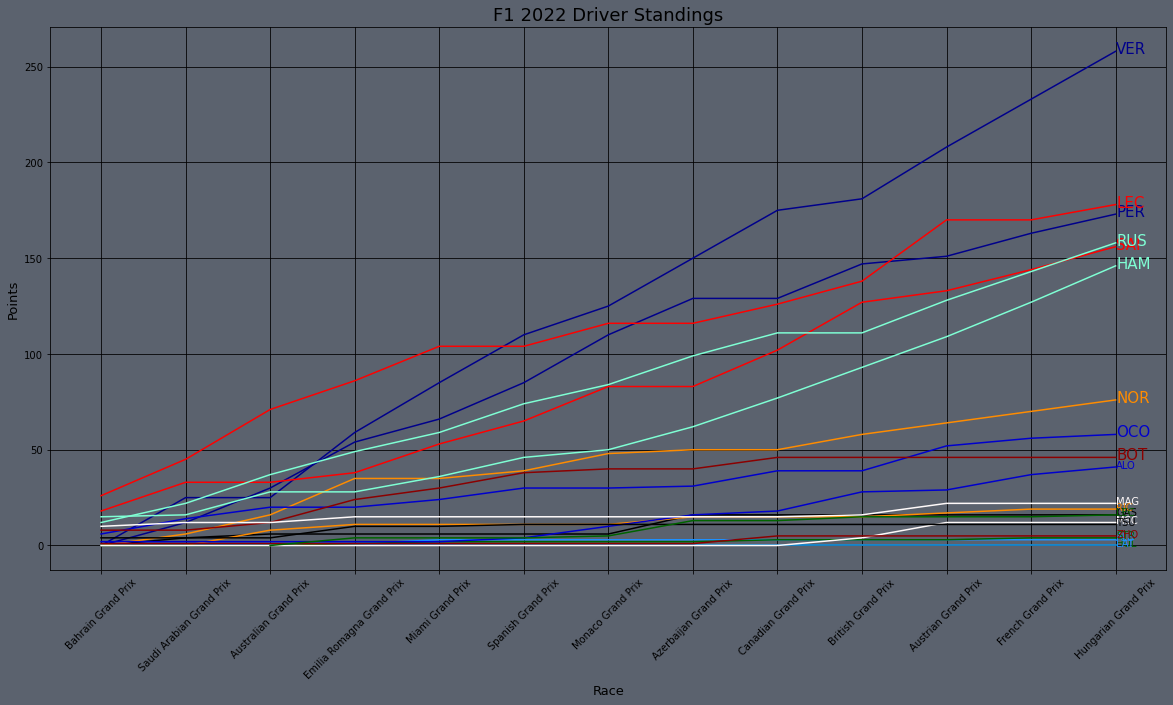

In [56]:

fig =  plt.figure( figsize=(20,10))

colors=['black', 'darkblue', 'darkblue', 'darkgreen', 'dodgerblue', 'darkorange','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','mediumblue','black','mediumblue','darkred','red','red','aquamarine','aquamarine','snow','darkgreen']

ax = sns.lineplot(driver_standings['Race Name'], driver_standings['points'],palette=colors,hue=driver_standings['Name'], markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Driver Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)
plt.legend().set_visible(False)
x = 0
for line, name in zip(ax.lines, driver_standings['Name']):
    y = line.get_ydata()[-1]
    if y <= 45:
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=10, va="center")
    else:
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                    xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                    size=15, va="center")
    x+=1
    if x >= 21:
        break



plt.grid(color ='black')
plt.show()

In [47]:
driverids = driver_standings[(driver_standings['raceId'] == 1084) & (driver_standings['points'] < 45)]['driverId']

In [48]:
driver_standings2 = driver_standings[driver_standings['driverId'].isin(driverids)]

In [49]:
driver_standings2[driver_standings2['raceId'] == 1084]

,index,driverStandingsId,raceId,driverId,points,position,positionText,wins,Name,Race Name,Team
212,33627,71505,1084,825,22.0,11,11,0,MAG,Austrian Grand Prix,snow
215,33630,71508,1084,852,11.0,16,16,0,TSU,Austrian Grand Prix,gray
216,33631,71509,1084,4,29.0,10,10,0,ALO,Austrian Grand Prix,mediumblue
217,33632,71510,1084,855,5.0,17,17,0,ZHO,Austrian Grand Prix,darkred
218,33633,71511,1084,854,12.0,15,15,0,MSC,Austrian Grand Prix,snow
219,33634,71512,1084,840,3.0,19,19,0,STR,Austrian Grand Prix,darkgreen
220,33635,71513,1084,848,3.0,18,18,0,ALB,Austrian Grand Prix,dodgerblue
221,33636,71514,1084,817,17.0,12,12,0,RIC,Austrian Grand Prix,darkorange
223,33638,71516,1084,849,0.0,20,20,0,LAT,Austrian Grand Prix,dodgerblue
224,33639,71517,1084,807,0.0,21,21,0,HUL,Austrian Grand Prix,darkgreen


c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


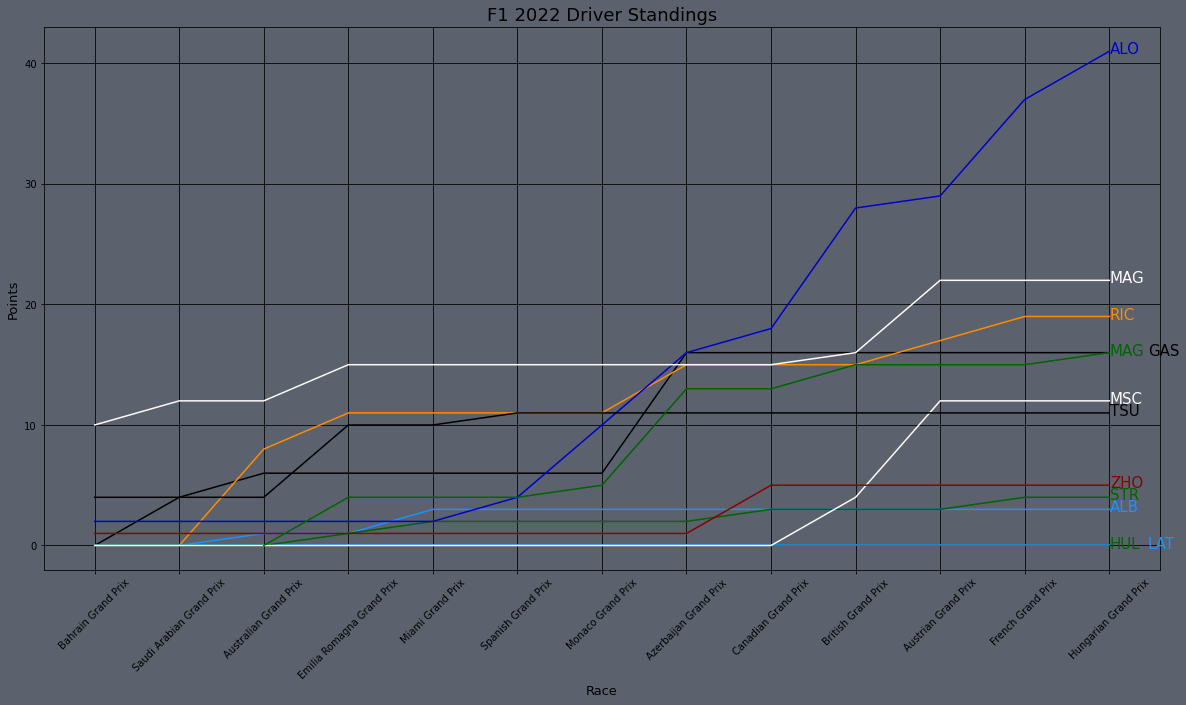

In [57]:

fig =  plt.figure( figsize=(20,10))

colors=['black', 'darkgreen', 'dodgerblue','darkorange', 'dodgerblue','darkgreen','snow',
'darkred','mediumblue','black','snow','darkgreen']

ax = sns.lineplot(driver_standings2['Race Name'], driver_standings2['points'],palette=colors,hue=driver_standings2['Name'], markers='o')



fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')


plt.xticks(rotation=45)

legend = plt.legend(loc=(1, .42))
frame = legend.get_frame()
frame.set_facecolor('#5b626e')
frame.set_edgecolor('black')
plt.title('F1 2022 Driver Standings', fontsize=18)
plt.ylabel('Points', fontsize=13)
plt.xlabel('Race', fontsize=13)

x = 0
for line, name in zip(ax.lines, driver_standings2['Name']):
    y = line.get_ydata()[-1]
    if name == 'LAT':
        ax.annotate(name, xy=(1,y), xytext=(-12,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")
    if name == 'GAS':
        ax.annotate(name, xy=(1,y), xytext=(-12,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")
    if name != 'LAT' and name != 'GAS':
        ax.annotate(name, xy=(1,y), xytext=(-50,2), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=15, va="center")

    x+=1
    if x >= 12:
        break


plt.legend().set_visible(False)
plt.grid(color ='black')
plt.show()